The data set encompasses 39,953 locations for 9,924 disasters that occurred worldwide in the years 1960 to 2018. All floods, storms (typhoons, monsoons etc.), earthquakes, landslides, droughts, volcanic activity and extreme temperatures that were recorded in EM-DAT during these 58 years and could be geocoded are included in the data set. The highest spatial resolution in the data set corresponds to administrative level 3 (usually district/commune/village) in the Global Administrative Areas database (GADM, 2018). The vast majority of the locations are administrative level 1 (typically state/province/region).

In [1]:
# !pip install jupyter_bokeh
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import scipy.stats as st
from citipy import citipy

csv_file = 'Resources/pend-gdis-1960-2018-disasterlocations.csv'

In [2]:
# Andy
df = pd.read_csv(csv_file)
df.head()

,id,country,iso3,gwno,year,geo_id,geolocation,level,adm1,adm2,adm3,location,historical,hist_country,disastertype,disasterno,latitude,longitude
0,109,Albania,ALB,339.0,2009,346,Ana E Malit,3,Shkoder,Shkodres,Ana E Malit,Ana E Malit,0,NaN,flood,2009-0631,42.020948,19.418317
1,109,Albania,ALB,339.0,2009,351,Bushat,3,Shkoder,Shkodres,Bushat,Bushat,0,NaN,flood,2009-0631,41.959294,19.514309
2,175,Angola,AGO,540.0,2001,760,Onjiva,3,Cunene,Cuanhama,Onjiva,Onjiva,0,NaN,flood,2001-0146,-17.093484,15.665758
3,187,Angola,AGO,540.0,2009,710,Evale,3,Cunene,Cuanhama,Evale,Evale,0,NaN,flood,2009-0092,-16.531533,15.773987
4,187,Angola,AGO,540.0,2009,749,Mupa,3,Cunene,Cuvelai,Mupa,Mupa,0,NaN,flood,2009-0092,-16.200065,15.844189


In [3]:
# Riley
# Creation of clean data frame

clean_df = df[['id','country','year','level','location','disastertype','disasterno','latitude','longitude']]
clean_df.head()

,id,country,year,level,location,disastertype,disasterno,latitude,longitude
0,109,Albania,2009,3,Ana E Malit,flood,2009-0631,42.020948,19.418317
1,109,Albania,2009,3,Bushat,flood,2009-0631,41.959294,19.514309
2,175,Angola,2001,3,Onjiva,flood,2001-0146,-17.093484,15.665758
3,187,Angola,2009,3,Evale,flood,2009-0092,-16.531533,15.773987
4,187,Angola,2009,3,Mupa,flood,2009-0092,-16.200065,15.844189


In [4]:
# Riley
disaster_count_df = clean_df.drop_duplicates(subset = ['id']).groupby(['level'])['disastertype'].count()
disaster_count_df.head()

level
1    5965
2    3237
3     722
Name: disastertype, dtype: int64

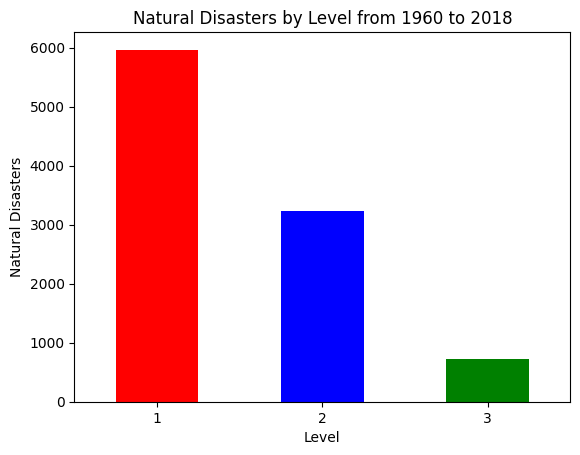

In [5]:
# Riley

# Creation of bar graph showcasing different levels
disaster_count_df.plot(kind = 'bar', title = 'Natural Disasters by Level from 1960 to 2018', xlabel = 'Level', ylabel = 'Natural Disasters',color = ['red','blue','green'])
plt.xticks(rotation='horizontal')
plt.show()



In [6]:
storms_per_city = clean_df.groupby(['location','latitude','longitude'])['disasterno'].count()
storms_per_city.reset_index()
storms_per_city

def get_nearest_city(row):
    try:
        return citipy.nearest_city(row["latitude"], row["longitude"]).city_name
    except:
        return "N/A"

new_clean_df = clean_df.copy()
new_clean_df['approximate_location'] = new_clean_df.apply(get_nearest_city, axis=1)
new_clean_df['approximate_location'] = new_clean_df['approximate_location'].str.capitalize()
new_clean_df.to_csv('clean_df.csv', index = False)
new_clean_df.head()

,id,country,year,level,location,disastertype,disasterno,latitude,longitude,approximate_location
0,109,Albania,2009,3,Ana E Malit,flood,2009-0631,42.020948,19.418317,Shkoder
1,109,Albania,2009,3,Bushat,flood,2009-0631,41.959294,19.514309,Shkoder
2,175,Angola,2001,3,Onjiva,flood,2001-0146,-17.093484,15.665758,Ondjiva
3,187,Angola,2009,3,Evale,flood,2009-0092,-16.531533,15.773987,Ondjiva
4,187,Angola,2009,3,Mupa,flood,2009-0092,-16.200065,15.844189,Ondjiva


In [7]:
# Andy
decades = new_clean_df.copy()

bins = [1960,1970,1980,1990,2000,2010,2020]
group_names = ['1960s','1970s','1980s','1990s','2000s','2010s']

decades['decade'] = pd.cut(df['year'],
                           bins, labels=group_names, 
                           include_lowest=True)
decades.head()


,id,country,year,level,location,disastertype,disasterno,latitude,longitude,approximate_location,decade
0,109,Albania,2009,3,Ana E Malit,flood,2009-0631,42.020948,19.418317,Shkoder,2000s
1,109,Albania,2009,3,Bushat,flood,2009-0631,41.959294,19.514309,Shkoder,2000s
2,175,Angola,2001,3,Onjiva,flood,2001-0146,-17.093484,15.665758,Ondjiva,2000s
3,187,Angola,2009,3,Evale,flood,2009-0092,-16.531533,15.773987,Ondjiva,2000s
4,187,Angola,2009,3,Mupa,flood,2009-0092,-16.200065,15.844189,Ondjiva,2000s


In [11]:
# I want to group by approximate _location_de
approximate_location_count = decades.groupby(['disastertype','approximate_location', 'decade']).size().reset_index(name='count')
locations_df = decades.drop_duplicates(subset = 'approximate_location')[['approximate_location','latitude','longitude','country']]
#['latitude','longitude','country'].reset_index()
storm_count_by_decade = pd.merge(approximate_location_count,locations_df, how='left',on='approximate_location')
storm_count_by_decade = storm_count_by_decade[(storm_count_by_decade['count'] != 0)].reset_index()
storm_count_by_decade['Scaled Size'] = storm_count_by_decade.apply(lambda x: x['count'] * 25, axis = 1)
storm_count_by_decade.head()

C:\Users\riley\AppData\Local\Temp\ipykernel_38740\2719678366.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approximate_location_count = decades.groupby(['disastertype','approximate_location', 'decade']).size().reset_index(name='count')


,index,disastertype,approximate_location,decade,count,latitude,longitude,country,Scaled Size
0,27,drought,'ali sabieh,1990s,1,11.243546,42.905201,Djibouti,25
1,28,drought,'ali sabieh,2000s,4,11.243546,42.905201,Djibouti,100
2,56,drought,Abancay,1980s,1,-13.732697,-72.834497,Peru,25
3,58,drought,Abancay,2000s,1,-13.732697,-72.834497,Peru,25
4,100,drought,Abeche,2000s,2,13.540096,21.156536,Chad,50


In [17]:
# Riley
def geo_plot_by_decade2(df):
    #points_to_chart = df.loc[df['disastertype'] == disastertype]
    # Create the map plot
    map_plot = df.hvplot.points(
        "longitude",
        "latitude",
        # Configure the map plot
        geo="True", # show geo data
        tiles="OSM",  # OpenStreetMap tiles
        frame_width=700,
        frame_height=500,
        size='Scaled Size',  # Size of the points determined by Humidity
        color='count',  # Color by city
        scale=1,
        cmap='Rainbow',
        xlim=(-180, 180),  
        ylim=(-75, 75),
        groupby=['decade', 'disastertype'],
        hover_cols=['approximate_location','country','count']

    )

    # Display the map
    return map_plot

In [18]:
# Riley
geo_plot_by_decade2(storm_count_by_decade)

:DynamicMap   [decade,disastertype]
   :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [longitude,latitude]   (count,Scaled Size,approximate_location,country)

In [27]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x, y): #, xlabel, ylabel, title): #, hemisphere):
    # Set data ranges forformatting plots 
    xlabel = ""
    ylabel = ""
    title = ""
    # Force the x axis to have the same range for easy comparison
    # if hemisphere == 'north': # Northern Hemisphere
    x_min = 1960
    x_max = 2018
    # elif hemisphere == 'south': # Southern Hemisphere
    #     x_min = -80
    #     x_max = 0
        
    x_range = x_max - x_min
    y_min = min(y)
    y_max = max(y)
    y_range = y_max - y_min
    
    # Calc regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    # Calc regress values for y values on line 
    regress_values = x * slope + intercept
    # Format regression equation for display
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Print the r^2 value
    print(f'The r^2-value is: {rvalue**2}')
    
    # plot the regression
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,
                 (x_min+x_range*0.05,y_max+y_range*0.1),
                 fontsize=15,
                 color="red")
   
    # plot the data
    plt.scatter(x, y)
    
    # Format plt
    plt.axis([x_min-x_range*0.05, 
              x_max+x_range*0.05, 
              y_min-y_range*0.05, 
              y_max+y_range*0.2])
    plt.title(f'{title}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    # Show plot
    plt.show()

In [37]:
csv_file = 'Resources/events-US-1980-2024-Q3.csv'
df = pd.read_csv(csv_file)
df.head()

df.columns = df.iloc[1]

df = df.drop(df.index[0:2]).reset_index(drop=True)
df = df[pd.to_numeric(df['CPI-Adjusted Cost'], errors='coerce').notna()]
df[['CPI-Adjusted Cost','Unadjusted Cost', 'Deaths']]= df[['CPI-Adjusted Cost','Unadjusted Cost', 'Deaths']].astype(float)

In [44]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x, y): #, xlabel, ylabel, title): #, hemisphere):
    # Set data ranges forformatting plots 
    xlabel = ""
    ylabel = ""
    title = ""
    # Force the x axis to have the same range for easy comparison
    # if hemisphere == 'north': # Northern Hemisphere
    #x_min = 1960
    #x_max = 2018
    # elif hemisphere == 'south': # Southern Hemisphere
    x_min = min(x)
    x_max = max(x) + 100
        
    x_range = x_max - x_min
    y_min = min(y)
    y_max = max(y)
    y_range = y_max - y_min
    
    # Calc regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    # Calc regress values for y values on line 
    regress_values = x * slope + intercept
    # Format regression equation for display
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Print the r^2 value
    print(f'The r^2-value is: {rvalue**2}')
    
    # plot the regression
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,
                 (x_min+x_range*0.05,y_max+y_range*0.1),
                 fontsize=15,
                 color="red")
   
    # plot the data
    plt.scatter(x, y)
    
    # Format plt
    plt.axis([x_min-x_range*0.05, 
              x_max+x_range*0.05, 
              y_min-y_range*0.05, 
              y_max+y_range*0.2])
    plt.title(f'{title}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    # Show plot
    plt.show()

The r^2-value is: 0.355867849169503


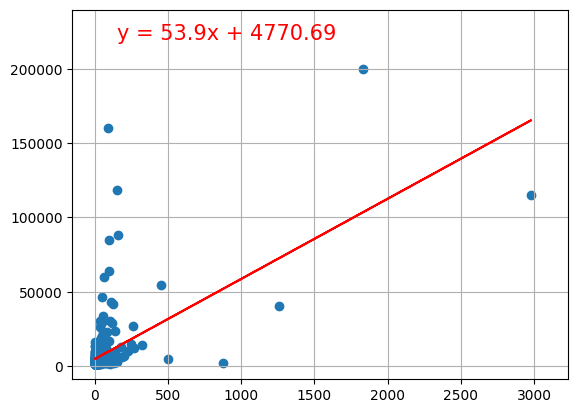

In [45]:
plot_linear_regression(df['Deaths'], df['CPI-Adjusted Cost'])

The r^2-value is: 0.355867849169503


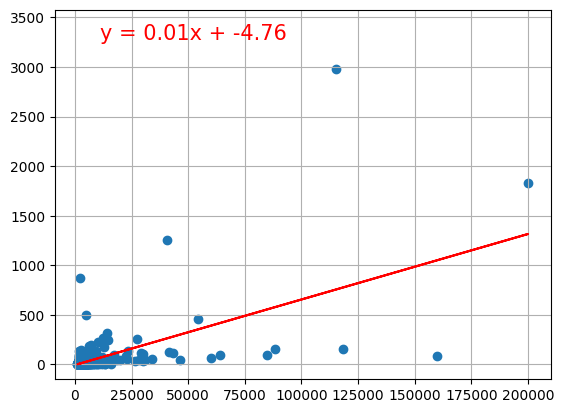

In [46]:
plot_linear_regression(df['CPI-Adjusted Cost'], df['Deaths'])

The r^2-value is: 0.9563205381665687


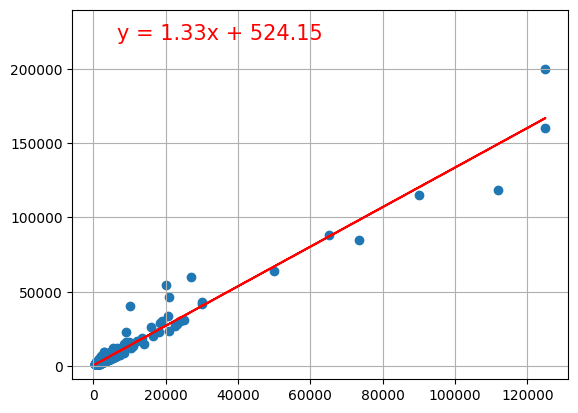

In [48]:
plot_linear_regression(df['Unadjusted Cost'], df['CPI-Adjusted Cost'])

In [52]:
tropical_cyclones = df[(df['Disaster'] == 'Tropical Cyclone')]
tropical_cyclones['Duration'] = tropical_cyclones.apply(lambda x: int(x['End Date']) - int(x['Begin Date']),axis = 1)
tropical_cyclones.head()

C:\Users\riley\AppData\Local\Temp\ipykernel_38740\3603453885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tropical_cyclones['Duration'] = tropical_cyclones.apply(lambda x: int(x['End Date']) - int(x['Begin Date']),axis = 1)


1,Name,Disaster,Begin Date,End Date,CPI-Adjusted Cost,Unadjusted Cost,Deaths,Duration
1,Hurricane Allen (August 1980),Tropical Cyclone,19800807,19800811,2230.2,590.0,13.0,4
10,Hurricane Alicia (August 1983),Tropical Cyclone,19830817,19830820,9420.0,3000.0,21.0,3
19,Hurricane Elena (September 1985),Tropical Cyclone,19850830,19850903,3775.4,1297.4,4.0,73
20,Hurricane Gloria (September 1985),Tropical Cyclone,19850926,19850928,2482.9,856.1,11.0,2
21,Hurricane Juan (October 1985),Tropical Cyclone,19851027,19851031,4325.5,1496.7,63.0,4


The r^2-value is: 0.37704241519376824


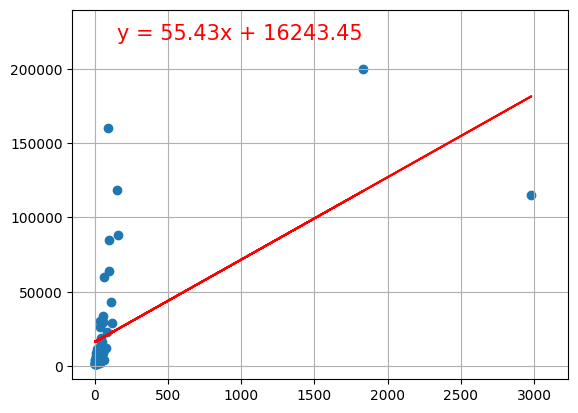

In [53]:
plot_linear_regression(tropical_cyclones['Deaths'], tropical_cyclones['CPI-Adjusted Cost'])

The r^2-value is: 0.0007865432618292851


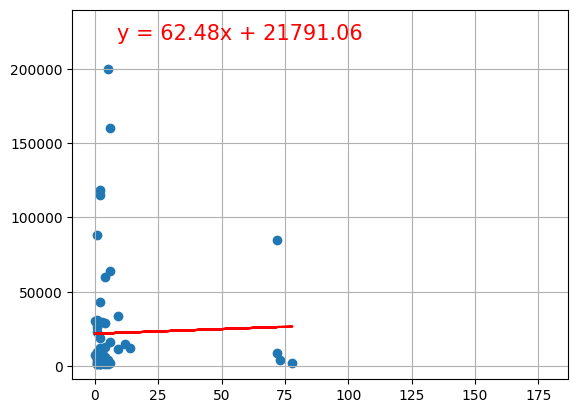

In [54]:
plot_linear_regression(tropical_cyclones['Duration'], tropical_cyclones['CPI-Adjusted Cost'])